In [2]:
import pandas as pd

In [3]:
LOCAL = '../data/tanzania/'

train_features = pd.read_csv(LOCAL + 'train_features.csv')
train_labels = pd.read_csv(LOCAL + 'train_labels.csv')
test_features = pd.read_csv(LOCAL + 'test_features.csv')
sample_submission = pd.read_csv(LOCAL + 'sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [4]:
train_features.head().T

0                        1  \
id                                       69572                     8776   
amount_tsh                                6000                        0   
date_recorded                       2011-03-14               2013-03-06   
funder                                   Roman                  Grumeti   
gps_height                                1390                     1399   
installer                                Roman                  GRUMETI   
longitude                              34.9381                  34.6988   
latitude                              -9.85632                 -2.14747   
wpt_name                                  none                 Zahanati   
num_private                                  0                        0   
basin                               Lake Nyasa            Lake Victoria   
subvillage                            Mnyusi B                  Nyamara   
region                                  Iringa                     Mara   
region_code                                 11                       20   
district_code                                5                        2   
lga                                     Ludewa                Serengeti   
ward                                  Mundindi                    Natta   
population                                 109                      280   
public_meeting                            True                      NaN   
recorded_by            GeoData Consultants Ltd  GeoData Consultants Ltd   
scheme_management                          VWC                    Other   
scheme_name                              Roman                      NaN   
permit                                   False                     True   
construction_year                         1999                     2010   
extraction_type                        gravity                  gravity   
extraction_type_group                  gravity                  gravity   
extraction_type_class                  gravity                  gravity   
management                                 vwc                      wug   
management_group                    user-group               user-group   
payment                           pay annually                never pay   
payment_type                          annually                never pay   
water_quality                             soft                     soft   
quality_group                             good                     good   
quantity                                enough             insufficient   
quantity_group                          enough             insufficient   
source                                  spring     rainwater harvesting   
source_type                             spring     rainwater harvesting   
source_class                       groundwater                  surface   
waterpoint_type             communal standpipe       communal standpipe   
waterpoint_type_group       communal standpipe       communal standpipe   

                                                 2  \
id                                           34310   
amount_tsh                                      25   
date_recorded                           2013-02-25   
funder                                Lottery Club   
gps_height                                     686   
installer                             World vision   
longitude                                  37.4607   
latitude                                  -3.82133   
wpt_name                               Kwa Mahundi   
num_private                                      0   
basin                                      Pangani   
subvillage                                 Majengo   
region                                     Manyara   
region_code                                     21   
district_code                                    4   
lga                                      Simanjiro   
ward                                       Ngorika 

In [5]:
train_features.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

In [6]:
train_labels.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [7]:
train_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [8]:
test_features.describe()

id     amount_tsh  gps_height     longitude      latitude  \
count  14358.000000   14358.000000  14358.0000  14358.000000  1.435800e+04   
mean   37232.859799     324.219996    653.6363     34.082414 -5.697584e+00   
std    21382.890432    2533.367778    688.2721      6.564449  2.947444e+00   
min       10.000000       0.000000    -57.0000      0.000000 -1.156459e+01   
25%    18765.500000       0.000000      0.0000     33.062317 -8.453125e+00   
50%    37442.000000       0.000000    346.0000     34.898976 -5.087905e+00   
75%    55909.250000      25.000000   1306.0000     37.221606 -3.314240e+00   
max    74249.000000  200000.000000   2777.0000     40.325016 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  14358.000000  14358.000000   14358.000000  14358.000000   
mean       0.408971     15.156359       5.713052    187.055439   
std        8.231859     17.387588       9.794304    476.065978   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    230.000000   
max      669.000000     99.000000      80.000000  11469.000000   

       construction_year  
count       14358.000000  
mean         1298.251985  
std           952.551852  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

In [9]:
sample_submission.head()

id status_group
0  50785   functional
1  51630   functional
2  17168   functional
3  45559   functional
4  49871   functional

In [10]:
import pandas_profiling
train_features.profile_report()

In [11]:
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.80, test_size=0.20,
    stratify=y_train, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [13]:
y_train.value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [14]:
y_val.value_counts(normalize=True)

functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: status_group, dtype: float64

In [15]:
X_train.describe(exclude='number').T.sort_values(by='unique')

count unique                      top   freq
recorded_by            47520      1  GeoData Consultants Ltd  47520
public_meeting         44876      2                     True  40838
permit                 45077      2                     True  31071
source_class           47520      3              groundwater  36638
management_group       47520      5               user-group  42027
quantity_group         47520      5                   enough  26567
quantity               47520      5                   enough  26567
waterpoint_type_group  47520      6       communal standpipe  27642
quality_group          47520      6                     good  40598
payment_type           47520      7                never pay  20287
source_type            47520      7                   spring  13620
waterpoint_type        47520      7       communal standpipe  22778
extraction_type_class  47520      7                  gravity  21448
payment                47520      7                never pay  20287
water_quality          47520      8                     soft  40598
basin                  47520      9            Lake Victoria   8137
source                 47520     10                   spring  13620
scheme_management      44392     12                      VWC  29470
management             47520     12                      vwc  32449
extraction_type_group  47520     13                  gravity  21448
extraction_type        47520     18                  gravity  21448
region                 47520     21                   Iringa   4250
lga                    47520    124                   Njombe   2003
date_recorded          47520    349               2011-03-17    474
funder                 44616   1716   Government Of Tanzania   7321
installer              44603   1929                      DWE  13978
ward                   47520   2082                    Igosi    257
scheme_name            24988   2563                        K    548
subvillage             47234  17231                  Shuleni    420
wpt_name               47520  30661                     none   2879

In [16]:
X_train['quantity'].value_counts(dropna=True)

enough          26567
insufficient    12153
dry              4921
seasonal         3244
unknown           635
Name: quantity, dtype: int64

In [102]:
!pip install category_encoders

In [17]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

categorical_features = ['quantity']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


Validation Accuracy 0.6579124579124579


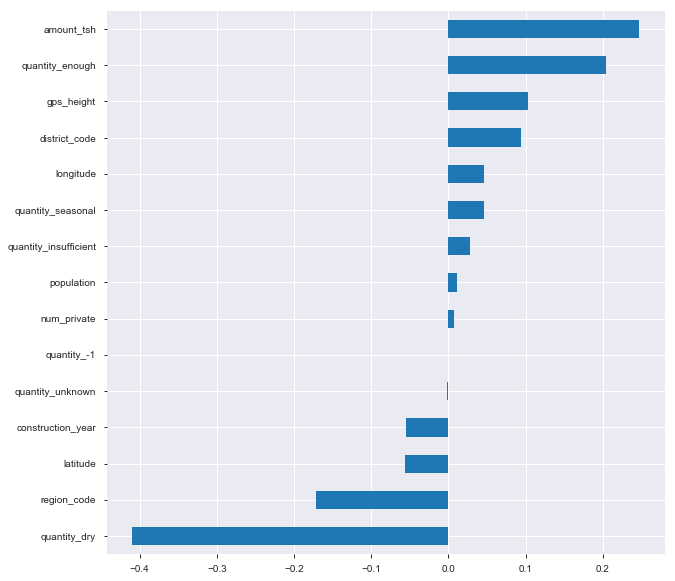

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

In [104]:
X_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [105]:
from sklearn import metrics

features = ['amount_tsh', 'gps_height', 'latitude', 'num_private',
       'basin', 'region', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group']

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


Validation Accuracy 0.7358585858585859


In [106]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
all(X_test_encoded.columns == X_train_encoded.columns)

C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


True

In [107]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)

In [120]:
features = ['amount_tsh', 'gps_height', 'latitude', 'num_private',
       'basin', 'region', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group','installer','scheme_name']

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)

X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

# ce_hash = ce.HashingEncoder(cols = ['installer'])
# X_train_hashed = ce_hash.fit_transform(X_train_encoded)
# X_val_hashed = ce_hash.transform(X_val_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


Validation Accuracy 0.7724747474747474


In [121]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
all(X_test_encoded.columns == X_train_encoded.columns)

C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


True

In [122]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-02.csv', index=False)